In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#pull data
unsorted_data = pd.DataFrame.from_csv("/Users/Mahir/Documents/Personal/Comp Sci/analyzing_lesions/clinical_info.csv")
#gather only SP and RR
rr = unsorted_data['dc'] == 'RR'
sp = unsorted_data['dc'] == 'SP'
rr_df = unsorted_data[rr]
sp_df = unsorted_data[sp]
scores_lesion = rr_df.append(sp_df)
scores_lesion

,mse,total_lesions,max_lesion_volume,min_lesion_volume,total_volume_of_lesions,average_volume,median_volume,inf_total_lesions,inf_max_lesion_volume,inf_min_lesion_volume,...,sub_max_lesion_volume,sub_min_lesion_volume,sub_total_volume_of_lesions,sub_average_volume,sub_median_volume,edss,dc,dd,msfc 25 1,msfc 25 2
0,mse1,15,429.0,15.0,1661.0,110.733333,72.0,1,53.0,53.0,...,79.0,15.0,155.0,51.666667,61.0,3.5,RR,35.0,6.3,6.1
1,mse1003,16,4427.0,44.0,9706.0,606.625000,108.5,0,0.0,0.0,...,4427.0,44.0,5092.0,727.428571,108.0,2.0,RR,9.0,4.6,4.7
2,mse1009,6,81.0,40.0,346.0,57.666667,55.5,0,0.0,0.0,...,81.0,43.0,241.0,60.250000,58.5,2.0,RR,15.0,3.8,3.6
4,mse1017,3,123.0,72.0,310.0,103.333333,115.0,0,0.0,0.0,...,72.0,72.0,72.0,72.000000,72.0,0.0,RR,0.0,4.0,4.2
5,mse1023,7,358.0,75.0,1250.0,178.571429,168.0,0,0.0,0.0,...,168.0,75.0,243.0,121.500000,121.5,1.5,RR,5.0,4.3,4.2
6,mse1027,15,3584.0,19.0,10451.0,696.733333,336.0,0,0.0,0.0,...,3584.0,19.0,4031.0,806.200000,176.0,3.0,RR,14.0,4.9,4.7
8,mse1045,12,1193.0,20.0,2348.0,195.666667,56.0,0,0.0,0.0,...,243.0,20.0,699.0,87.375000,56.0,4.0,RR,20.0,4.5,4.4
12,mse1065,16,2306.0,16.0,5154.0,322.125000,89.0,0,0.0,0.0,...,844.0,27.0,1256.0,179.428571,50.0,1.0,RR,28.0,4.4,4.5
13,mse1070,28,917.0,18.0,4287.0,153.107143,79.0,0,0.0,0.0,...,917.0,18.0,2898.0,181.125000,69.0,1.0,RR,3.0,4.2,4.0
14,mse1076,10,943.0,41.0,1996.0,199.600000,94.5,0,0.0,0.0,...,274.0,106.0,380.0,190.000000,190.0,1.0,RR,1.0,4.0,4.3


Classification score: 0.928709677419 (p value: 0.00990099009901)
[ 0.87365591  0.87344086  0.87376344  0.87354839  0.87354839  0.87354839
  0.87397849  0.87376344  0.87397849  0.87365591  0.87376344  0.87354839
  0.87354839  0.87354839  0.87387097  0.87365591  0.87387097  0.87376344
  0.87419355  0.87365591  0.87376344  0.87344086  0.87408602  0.87376344
  0.87397849  0.87376344  0.87387097  0.87333333  0.87344086  0.87387097
  0.87376344  0.87365591  0.87365591  0.87408602  0.87397849  0.87397849
  0.87354839  0.87376344  0.87333333  0.87376344  0.87376344  0.87397849
  0.87365591  0.87387097  0.87376344  0.87376344  0.87397849  0.87397849
  0.87344086  0.87408602  0.87354839  0.87365591  0.87387097  0.87387097
  0.87387097  0.87397849  0.87354839  0.87397849  0.87397849  0.87376344
  0.87387097  0.87376344  0.87354839  0.87387097  0.87376344  0.87397849
  0.87344086  0.87397849  0.87408602  0.87397849  0.87387097  0.87387097
  0.87376344  0.87387097  0.87387097  0.87354839  0.8738709

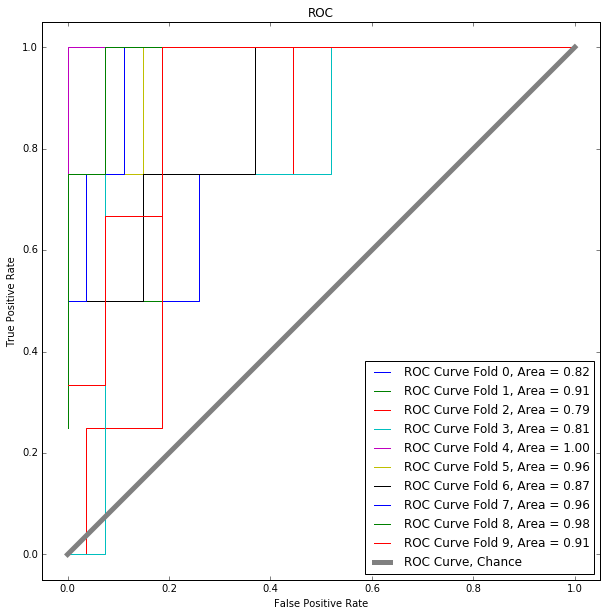

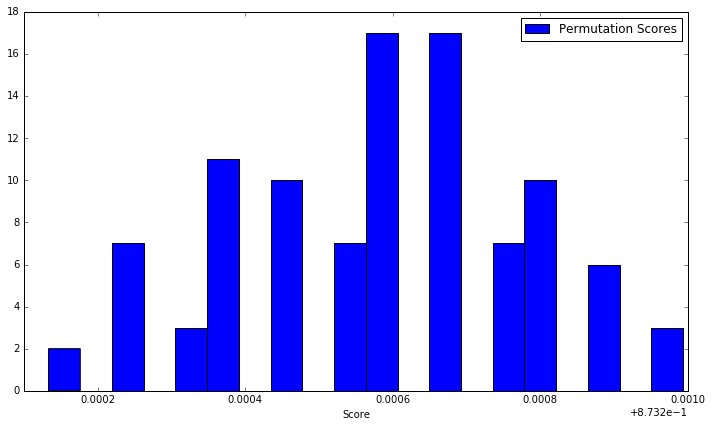

In [170]:
from sklearn import svm
from sklearn import cross_validation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold, permutation_test_score

#set X and y values
X_values=scores_lesion[['jux_total_lesions','total_lesions','edss']].values
y_values=scores_lesion.dc
n_classes = np.unique(y_values).size
y_values=label_binarize(y_values.values,classes=['RR','SP']).ravel()

#set classifier
cv = StratifiedKFold(y_values, n_folds=10)
clf = svm.SVC(kernel="linear", C=1, probability=True)

#calculate permutations
score, perm_score, pvalue = permutation_test_score(clf,
                                                   X_values,
                                                   y_values,
                                                   scoring="accuracy",
                                                   cv=cv,
                                                   n_permutations=100,
                                                   n_jobs=1)
print("Classification score: %s (p value: %s)" % (score,pvalue))

#calculate and plot ROC curves for each KFold
plt.figure(figsize=(10,10))
for i,(train,test) in enumerate(cv):
    clf = clf.fit(X_values[train],y_values[train])
    prob = clf.predict_proba(X_values[test])
    fpr,tpr,thres=roc_curve(y_values[test],prob[:,1])
    auc_data = auc(fpr,tpr)
    plt.plot(fpr,tpr,lw=1,label="ROC Curve Fold %d, Area = %0.2f" % (i, auc_data))
plt.plot([0,1],[0,1],lw=5,label="ROC Curve, Chance",color='gray')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')

#plot permutations test
plt.figure(figsize=(10,6))
plt.hist(perm_score,20,label="Permutation Scores")
ylim=plt.ylim()
#plt.plot([score,score],ylim,'--g',linewidth=3,label = 'Classification Score (pvalue: %s)' %pvalue)
plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.tight_layout()
plt.show()

In [32]:
#basic cv test
from sklearn import svm
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn import metrics

#set X and y values
X_values=scores_lesion[['inf_total_lesions','inf_total_volume_of_lesions']]
y_values=scores_lesion.dc

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X_values,y_values,test_size=0.50,random_state=0)

#set classifier
clf = svm.SVC(kernel='poly', C = 1,degree=2).fit(X_train,y_train)
prediction = clf.predict(X_test)

#determine number of correct and incorrect
number_correct = 0
number_wrong = 0
for count in range(len(y_test)):
    if prediction[count] == y_test.values[count]:
        number_correct += 1
    else:
        number_wrong += 1
print "Correct: {}  Incorrect: {}".format(number_correct,number_wrong)

Correct: 136  Incorrect: 19


309


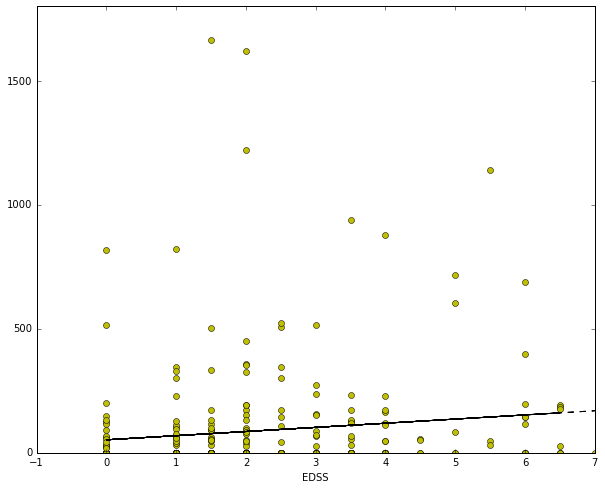

In [124]:
#basic scatterplot
print len(y_values)

x = scores_lesion.edss
y = scores_lesion.inf_total_volume_of_lesions
fit = np.polyfit(x,y,1)
fit_fn=np.poly1d(fit)

plt.figure(figsize=(10,8))
plt.plot(x,y,'yo',x,fit_fn(x),'--k')
plt.xlabel('EDSS')
plt.xlim(-1,)
plt.ylim(-1,)
plt.show()